# EXPLORATORY DATA ANALYSIS along with FEATURE ENGINEERING on the DATASETS 

### 1. DATA COLLECTION :

##### 1.1 IMPORTING NECESSARY LIBRARIES

In [1]:
pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

##### 1.2 LOADING THE REQUIRED DATASETS :

In [4]:
df1=pd.read_csv("../notebook/data/raw/EV_cars.csv")

In [5]:
df2=pd.read_csv("../notebook/data/raw/EV_Population_2.csv")

In [6]:
df3=pd.read_csv("../data/raw/ev_charging_patterns.csv")

In [7]:
df1

,75,Tesla Model Y Long Range Dual Motor,"https://ev-database.org/car/161Battery""",Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,"acceleration..0.100.9/Tesla-Model-Y-Long-Range-Dual-Motor""",172,670,59017,435,217,5
0,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57.5,Tesla Model Y,https://ev-database.org/car/1743/Tesla-Model-Y,164,580.0,47567.0,350,217,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [9]:
df3

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


Let's perform EDA on datasets one by one 

## EXPLORATORY DATA ANALYSIS ON DATASET 1ST

In [10]:
df1.head()

,75,Tesla Model Y Long Range Dual Motor,"https://ev-database.org/car/161Battery""",Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,"acceleration..0.100.9/Tesla-Model-Y-Long-Range-Dual-Motor""",172,670,59017,435,217,5
0,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57.5,Tesla Model Y,https://ev-database.org/car/1743/Tesla-Model-Y,164,580.0,47567.0,350,217,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1.columns

Index(['75', 'Tesla Model Y Long Range Dual Motor',
       'https://ev-database.org/car/161Battery"', 'Car_name', 'Car_name_link',
       'Efficiency', 'Fast_charge', 'Price.DE.', 'Range', 'Top_speed',
       'acceleration..0.100.9/Tesla-Model-Y-Long-Range-Dual-Motor"', '172',
       '670', '59017', '435', '217', '5'],
      dtype='object')

In [12]:
df1.dtypes

75                                                            float64
Tesla Model Y Long Range Dual Motor                            object
https://ev-database.org/car/161Battery"                        object
Car_name                                                        int64
Car_name_link                                                 float64
Efficiency                                                    float64
Fast_charge                                                     int64
Price.DE.                                                       int64
Range                                                         float64
Top_speed                                                     float64
acceleration..0.100.9/Tesla-Model-Y-Long-Range-Dual-Motor"    float64
172                                                           float64
670                                                           float64
59017                                                         float64
435                 

Converting the column names into lowercase

In [13]:
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df1.columns

Index(['75', 'tesla_model_y_long_range_dual_motor',
       'https://ev-database.org/car/161battery"', 'car_name', 'car_name_link',
       'efficiency', 'fast_charge', 'price.de.', 'range', 'top_speed',
       'acceleration..0.100.9/tesla-model-y-long-range-dual-motor"', '172',
       '670', '59017', '435', '217', '5'],
      dtype='object')

Checking NaN values

In [14]:
df1.isnull().sum()

75                                                              0
tesla_model_y_long_range_dual_motor                             0
https://ev-database.org/car/161battery"                         0
car_name                                                        0
car_name_link                                                   2
efficiency                                                     51
fast_charge                                                     0
price.de.                                                       0
range                                                           0
top_speed                                                     359
acceleration..0.100.9/tesla-model-y-long-range-dual-motor"    359
172                                                           359
670                                                           359
59017                                                         359
435                                                           359
217       

Converting int64 into Int64

In [15]:
df1['efficiency']=pd.to_numeric(df1['efficiency'],errors='coerce').astype('Int64')
df1['range']=pd.to_numeric(df1['range'],errors='coerce').astype('Int64')
df1['top_speed']=pd.to_numeric(df1['top_speed'],errors='coerce').astype('Int64')

TypeError: cannot safely cast non-equivalent object to int64

Converting float64 into Int64

In [ ]:
df1['battery'] = df1['battery'].round(0).astype('Int64')
df1['fast_charge'] = df1['fast_charge'].round(0).astype('Int64')
df1['price.de.'] = df1['price.de.'].round(0).astype('Int64')
df1['acceleration..0.100.'] = df1['acceleration..0.100.'].round(0).astype('Int64')

Price.DE.: The price of the electric vehicle in Germany.

As we can see the Price.DE. is the price of EVs in Germany , So we need to convert it into USD because our project is based on US datasets

Converting the German Price into USD

In [16]:
exchange_rate = 1.08 
df1['price_usd_estimated'] = df1['price.de.'] * exchange_rate
df1['price_usd_estimated'] = df1['price_usd_estimated'].round(0).astype('Int64')

In [17]:
df1.head(3)

,75,tesla_model_y_long_range_dual_motor,"https://ev-database.org/car/161battery""",car_name,car_name_link,efficiency,fast_charge,price.de.,range,top_speed,"acceleration..0.100.9/tesla-model-y-long-range-dual-motor""",172,670,59017,435,217,5,price_usd_estimated
0,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220,420,201,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217
1,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625,330,160,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173
2,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990,360,160,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173


Now , the new column is added which is the EVs price in USD after conversion

In [18]:
df1.dtypes

75                                                            float64
tesla_model_y_long_range_dual_motor                            object
https://ev-database.org/car/161battery"                        object
car_name                                                        int64
car_name_link                                                 float64
efficiency                                                      Int64
fast_charge                                                     int64
price.de.                                                       int64
range                                                         float64
top_speed                                                     float64
acceleration..0.100.9/tesla-model-y-long-range-dual-motor"    float64
172                                                           float64
670                                                           float64
59017                                                         float64
435                 

In [19]:
df1.isnull().sum()

75                                                              0
tesla_model_y_long_range_dual_motor                             0
https://ev-database.org/car/161battery"                         0
car_name                                                        0
car_name_link                                                   2
efficiency                                                     51
fast_charge                                                     0
price.de.                                                       0
range                                                           0
top_speed                                                     359
acceleration..0.100.9/tesla-model-y-long-range-dual-motor"    359
172                                                           359
670                                                           359
59017                                                         359
435                                                           359
217       

In [20]:
df1['fast_charge']=df1['fast_charge'].fillna(df1['fast_charge'].median())
df1['price.de.']=df1['price.de.'].fillna(df1['price.de.'].median())
df1['price_usd_estimated']=df1['price_usd_estimated'].fillna(df1['price_usd_estimated'].median())

In [21]:
df1.isnull().sum()

75                                                              0
tesla_model_y_long_range_dual_motor                             0
https://ev-database.org/car/161battery"                         0
car_name                                                        0
car_name_link                                                   2
efficiency                                                     51
fast_charge                                                     0
price.de.                                                       0
range                                                           0
top_speed                                                     359
acceleration..0.100.9/tesla-model-y-long-range-dual-motor"    359
172                                                           359
670                                                           359
59017                                                         359
435                                                           359
217       

## EXPLORATORY DATA ANALYSIS ON DATASET 2ND 

In [22]:
df2.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [23]:
df2.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Converting the column names into lowercase

In [24]:
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df2.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

Dropping the unnecessary column

In [25]:
df2.drop('vin_(1-10)', axis =1 ,inplace=True)

In [26]:
df2.dtypes

county                                                object
city                                                  object
state                                                 object
postal_code                                          float64
model_year                                             int64
make                                                  object
model                                                 object
electric_vehicle_type                                 object
clean_alternative_fuel_vehicle_(cafv)_eligibility     object
electric_range                                         int64
base_msrp                                              int64
legislative_district                                 float64
dol_vehicle_id                                         int64
vehicle_location                                      object
electric_utility                                      object
2020_census_tract                                    float64
dtype: object

Changing few name of the columns for ease

In [27]:
df2.columns=df2.columns.str.replace('county','country')
df2.columns=df2.columns.str.replace('clean_alternative_fuel_vehicle_(cafv)_eligibility','cafv_eligibility')

Checking NaN values

In [28]:
df2.isnull().sum()

country                    5
city                       5
state                      0
postal_code                5
model_year                 0
make                       0
model                      0
electric_vehicle_type      0
cafv_eligibility           0
electric_range             0
base_msrp                  0
legislative_district     389
dol_vehicle_id             0
vehicle_location           9
electric_utility           5
2020_census_tract          5
dtype: int64

Converting the floats and ints into Int64

In [29]:
df2['postal_code']=pd.to_numeric(df2['postal_code'],errors='coerce').astype('Int64')
df2['model_year']=pd.to_numeric(df2['model_year'],errors='coerce').astype('Int64')
df2['electric_range']=pd.to_numeric(df2['electric_range'],errors='coerce').astype('Int64')
df2['base_msrp']=pd.to_numeric(df2['base_msrp'],errors='coerce').astype('Int64')
df2['legislative_district']=pd.to_numeric(df2['legislative_district'],errors='coerce').astype('Int64')
df2['dol_vehicle_id']=pd.to_numeric(df2['dol_vehicle_id'],errors='coerce').astype('Int64')
df2['2020_census_tract']=pd.to_numeric(df2['2020_census_tract'],errors='coerce').astype('Int64')

Filling the null values with their respective medians in numeic columns

In [30]:
df2['postal_code']= df2['postal_code'].fillna(df2['postal_code'].median())
df2['legislative_district']= df2['legislative_district'].fillna(df2['legislative_district'].median())
df2['2020_census_tract']= df2['2020_census_tract'].fillna(df2['2020_census_tract'].median())

Filling the null values with "Unknown" in categorical columns

In [31]:
df2.fillna('Unknown', inplace=True)

In [32]:
df2.isnull().sum()

country                  0
city                     0
state                    0
postal_code              0
model_year               0
make                     0
model                    0
electric_vehicle_type    0
cafv_eligibility         0
electric_range           0
base_msrp                0
legislative_district     0
dol_vehicle_id           0
vehicle_location         0
electric_utility         0
2020_census_tract        0
dtype: int64

## EXPLORATORY DATA ANALYSIS ON DATASET 3rd 

In [33]:
df3.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [34]:
df3.dtypes

User ID                                      object
Vehicle Model                                object
Battery Capacity (kWh)                      float64
Charging Station ID                          object
Charging Station Location                    object
Charging Start Time                          object
Charging End Time                            object
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                  object
Day of Week                                  object
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Charger Type                                 object
User Type   

In [35]:
df3.columns = df3.columns.str.lower().str.replace(' ', '_')
df3.columns

Index(['user_id', 'vehicle_model', 'battery_capacity_(kwh)',
       'charging_station_id', 'charging_station_location',
       'charging_start_time', 'charging_end_time', 'energy_consumed_(kwh)',
       'charging_duration_(hours)', 'charging_rate_(kw)',
       'charging_cost_(usd)', 'time_of_day', 'day_of_week',
       'state_of_charge_(start_%)', 'state_of_charge_(end_%)',
       'distance_driven_(since_last_charge)_(km)', 'temperature_(°c)',
       'vehicle_age_(years)', 'charger_type', 'user_type'],
      dtype='object')

Checking NaN values

In [36]:
df3.isnull().sum()

user_id                                      0
vehicle_model                                0
battery_capacity_(kwh)                       0
charging_station_id                          0
charging_station_location                    0
charging_start_time                          0
charging_end_time                            0
energy_consumed_(kwh)                       66
charging_duration_(hours)                    0
charging_rate_(kw)                          66
charging_cost_(usd)                          0
time_of_day                                  0
day_of_week                                  0
state_of_charge_(start_%)                    0
state_of_charge_(end_%)                      0
distance_driven_(since_last_charge)_(km)    66
temperature_(°c)                             0
vehicle_age_(years)                          0
charger_type                                 0
user_type                                    0
dtype: int64

Converting the dtype from float64 to Int64 

In [37]:
df3['battery_capacity_(kwh)']=df3['battery_capacity_(kwh)'].round(0).astype('Int64')

In [38]:
df3['energy_consumed_(kwh)']=df3['energy_consumed_(kwh)'].round(0).astype('Int64')
df3['charging_duration_(hours)']=df3['charging_duration_(hours)'].round(0).astype('Int64')
df3['charging_rate_(kw)']=df3['charging_rate_(kw)'].round(0).astype('Int64')
df3['charging_cost_(usd)']=df3['charging_cost_(usd)'].round(0).astype('Int64')
df3['state_of_charge_(start_%)']=df3['state_of_charge_(start_%)'].round(0).astype('Int64')
df3['state_of_charge_(end_%)']=df3['state_of_charge_(end_%)'].round(0).astype('Int64')
df3['distance_driven_(since_last_charge)_(km)']=df3['distance_driven_(since_last_charge)_(km)'].round(0).astype('Int64')
df3['temperature_(°c)']=df3['temperature_(°c)'].round(0).astype('Int64')
df3['vehicle_age_(years)']=df3['vehicle_age_(years)'].round(0).astype('Int64')

Removing extra letters from the rows' data which can easily counted as an integer

In [39]:
df3['user_id'] = df3['user_id'].str.replace(r'[^\d]', '', regex=True)
df3['charging_station_id'] = df3['charging_station_id'].str.replace(r'[^\d]', '', regex=True)
df3['charging_start_time'] = df3['charging_start_time'].str.replace(r'[^\d]', '', regex=True)
df3['charging_end_time'] = df3['charging_end_time'].str.replace(r'[^\d]', '', regex=True)

Converting the datatype into Int64

In [40]:
df3['user_id'] = pd.to_numeric(df3['user_id'], errors='coerce').astype('Int64')
df3['charging_station_id'] = pd.to_numeric(df3['charging_station_id'], errors='coerce').astype('Int64')
df3['charging_start_time'] = pd.to_numeric(df3['charging_start_time'], errors='coerce').astype('Int64')
df3['charging_end_time'] = pd.to_numeric(df3['charging_end_time'], errors='coerce').astype('Int64')

In [41]:
df3.dtypes

user_id                                      Int64
vehicle_model                               object
battery_capacity_(kwh)                       Int64
charging_station_id                          Int64
charging_station_location                   object
charging_start_time                          Int64
charging_end_time                            Int64
energy_consumed_(kwh)                        Int64
charging_duration_(hours)                    Int64
charging_rate_(kw)                           Int64
charging_cost_(usd)                          Int64
time_of_day                                 object
day_of_week                                 object
state_of_charge_(start_%)                    Int64
state_of_charge_(end_%)                      Int64
distance_driven_(since_last_charge)_(km)     Int64
temperature_(°c)                             Int64
vehicle_age_(years)                          Int64
charger_type                                object
user_type                      

Filling NaN values whose dtype is integer with their respective median

In [42]:
df3['energy_consumed_(kwh)']= df3['energy_consumed_(kwh)'].fillna(df3['energy_consumed_(kwh)'].median())
df3['charging_rate_(kw)']= df3['charging_rate_(kw)'].fillna(df3['charging_rate_(kw)'].median())
df3['distance_driven_(since_last_charge)_(km)']= df3['distance_driven_(since_last_charge)_(km)'].fillna(df3['distance_driven_(since_last_charge)_(km)'].median())

In [43]:
df3.isnull().sum()

user_id                                     0
vehicle_model                               0
battery_capacity_(kwh)                      0
charging_station_id                         0
charging_station_location                   0
charging_start_time                         0
charging_end_time                           0
energy_consumed_(kwh)                       0
charging_duration_(hours)                   0
charging_rate_(kw)                          0
charging_cost_(usd)                         0
time_of_day                                 0
day_of_week                                 0
state_of_charge_(start_%)                   0
state_of_charge_(end_%)                     0
distance_driven_(since_last_charge)_(km)    0
temperature_(°c)                            0
vehicle_age_(years)                         0
charger_type                                0
user_type                                   0
dtype: int64

Graph & charts

1. EVs are too expensive

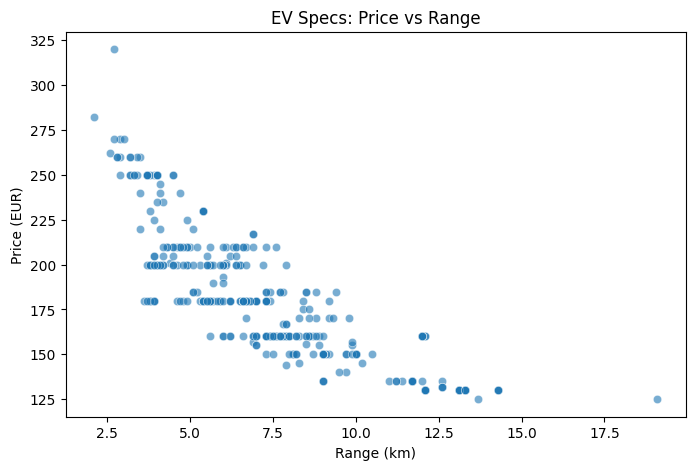

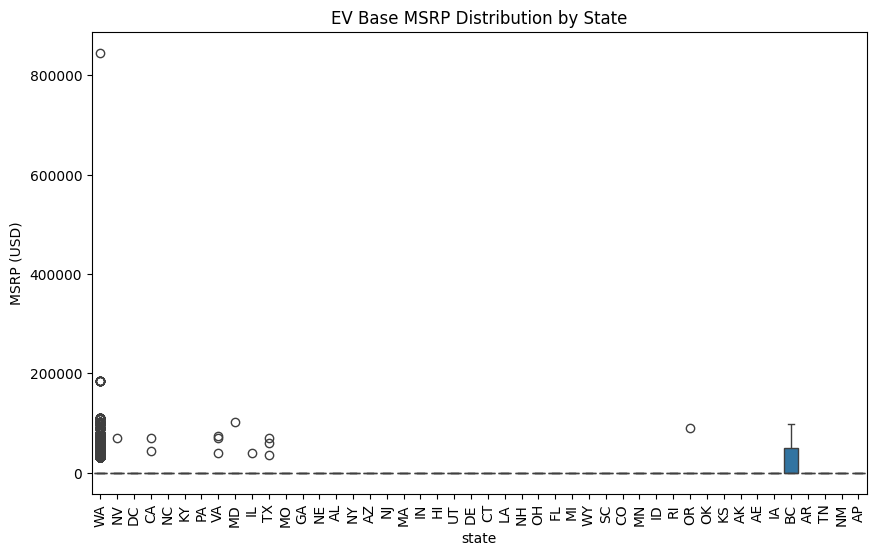

In [44]:
# Distribution of Price vs Range (df1 specs)
plt.figure(figsize=(8,5))
sns.scatterplot(x="range", y="price.de.", data=df1, alpha=0.6)
plt.title("EV Specs: Price vs Range")
plt.xlabel("Range (km)")
plt.ylabel("Price (EUR)")
plt.show()

# MSRP distribution by state (df2 adoption)
plt.figure(figsize=(10,6))
sns.boxplot(x="state", y="base_msrp", data=df2)
plt.xticks(rotation=90)
plt.title("EV Base MSRP Distribution by State")
plt.ylabel("MSRP (USD)")
plt.show()

2. Affordable EVs have poor range

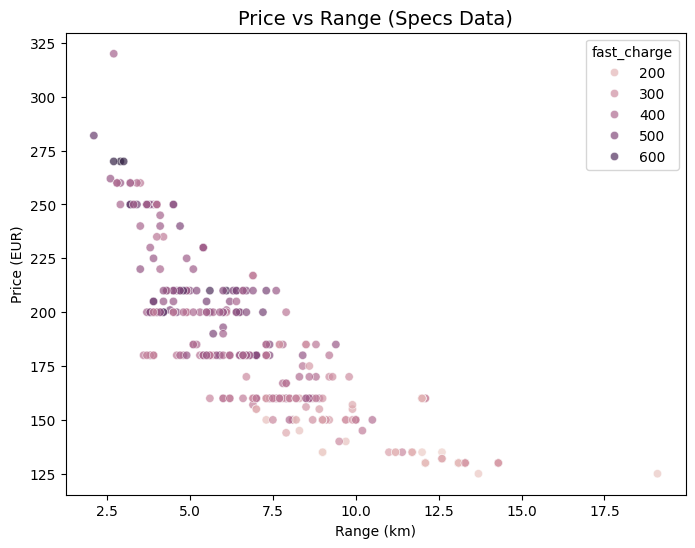

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1612\390198557.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


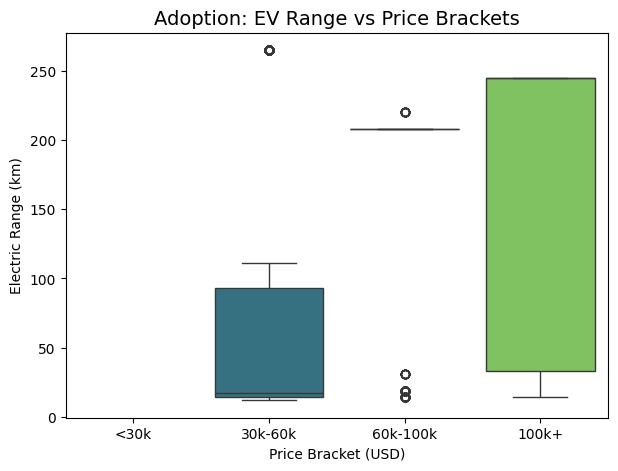

In [45]:
# --- 1. Price vs Range tradeoff (cheap vs luxury EVs) ---
# Ensure numeric columns
df1["range"] = pd.to_numeric(df1["range"], errors="coerce")
df1["price.de."] = pd.to_numeric(df1["price.de."], errors="coerce")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df1,
    x="range",
    y="price.de.",
    hue="fast_charge",
    alpha=0.7
)
plt.title("Price vs Range (Specs Data)", fontsize=14)
plt.xlabel("Range (km)")
plt.ylabel("Price (EUR)")
plt.show()

# --- 2. Adoption across price brackets ---
df2["base_msrp"] = pd.to_numeric(df2["base_msrp"], errors="coerce")
df2["electric_range"] = pd.to_numeric(df2["electric_range"], errors="coerce")

# Define price brackets
df2["price_bracket"] = pd.cut(
    df2["base_msrp"],
    bins=[0, 30000, 60000, 100000, 200000],
    labels=["<30k","30k-60k","60k-100k","100k+"]
)

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df2,
    x="price_bracket",
    y="electric_range",
    palette="viridis"
)
plt.title("Adoption: EV Range vs Price Brackets", fontsize=14)
plt.xlabel("Price Bracket (USD)")
plt.ylabel("Electric Range (km)")
plt.show()


3. Charging is slow, inconvenient, unevenly distributed

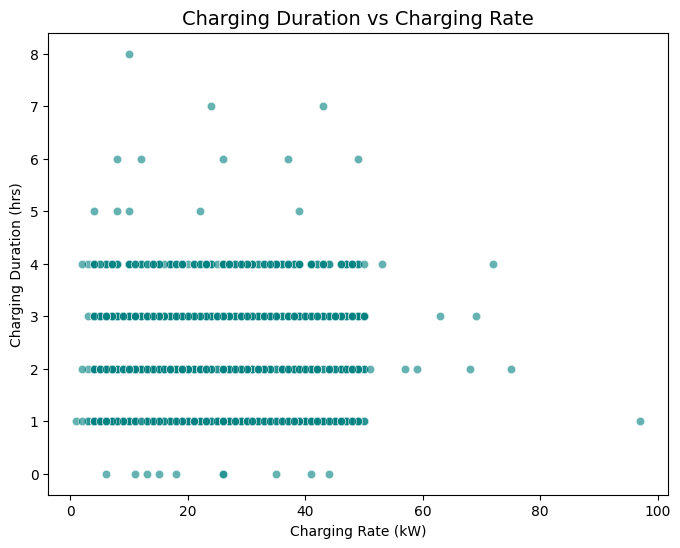

  state  ev_count  charger_count
0    AE       1.0            0.0
1    AK       1.0            0.0
2    AL       6.0            0.0
3    AP       1.0            0.0
4    AR       2.0            0.0


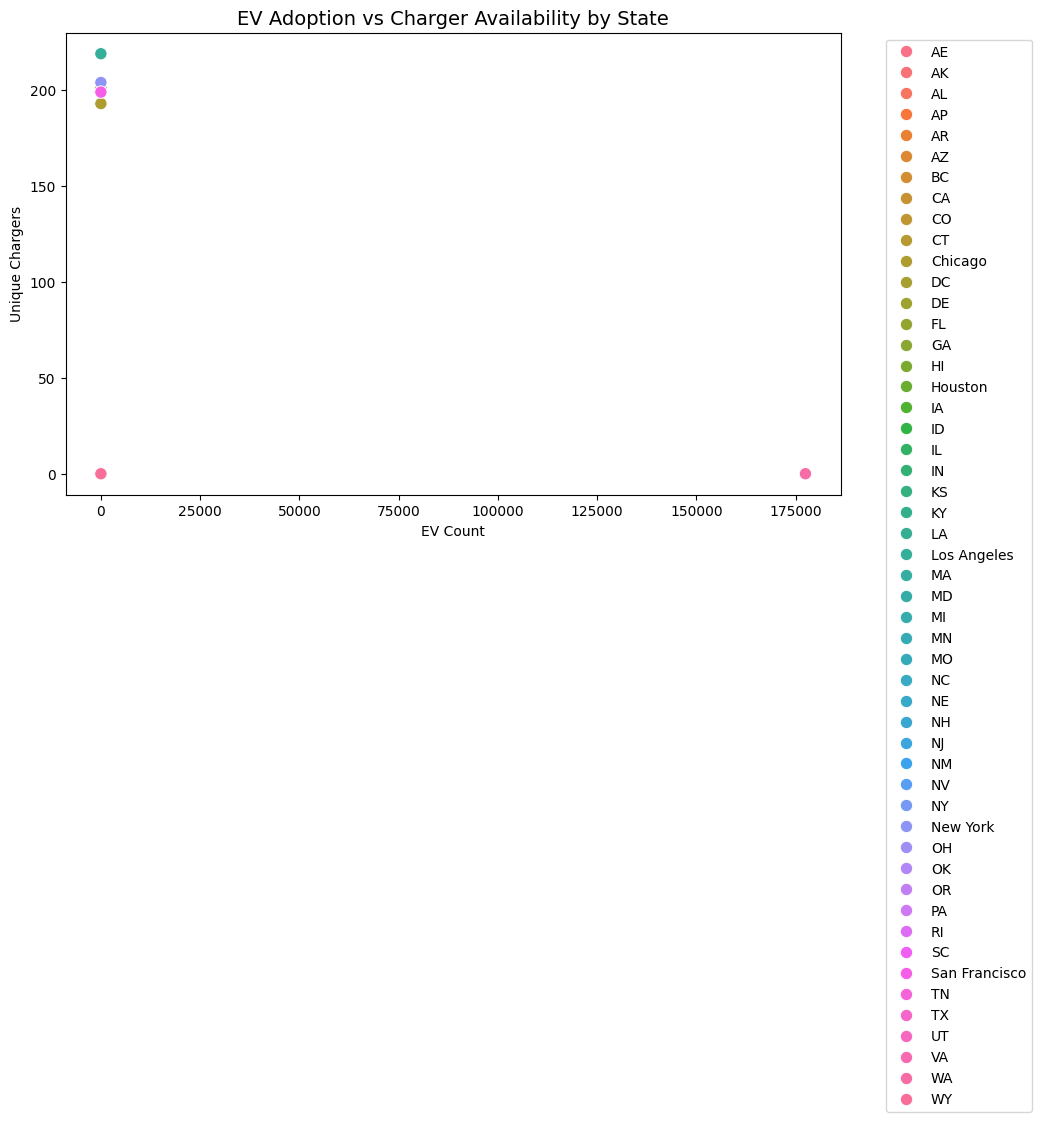

In [46]:
# --- 1. Charging duration vs charging rate ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df3,
    x="charging_rate_(kw)",
    y="charging_duration_(hours)",
    alpha=0.6,
    color="teal"
)
plt.title("Charging Duration vs Charging Rate", fontsize=14)
plt.xlabel("Charging Rate (kW)")
plt.ylabel("Charging Duration (hrs)")
plt.show()

# --- 2. Regional adoption (df2) ---
adoption_counts = df2["state"].value_counts().reset_index()
adoption_counts.columns = ["state", "ev_count"]

# --- 3. Charger availability (df3) ---

df3["state_extracted"] = df3["charging_station_location"].str.split(",").str[-1].str.strip()

charger_counts = df3.groupby("state_extracted")["charging_station_id"].nunique().reset_index()
charger_counts.columns = ["state", "charger_count"]

# --- 4. Merge adoption & charger availability ---
regional_stats = pd.merge(adoption_counts, charger_counts, on="state", how="outer").fillna(0)

print(regional_stats.head())

# Optional visualization: EV adoption vs charger availability
plt.figure(figsize=(10,6))
sns.scatterplot(data=regional_stats, x="ev_count", y="charger_count", hue="state", s=80)
plt.title("EV Adoption vs Charger Availability by State", fontsize=14)
plt.xlabel("EV Count")
plt.ylabel("Unique Chargers")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


4. Adoption is stalled outside rich/policy-supported regions

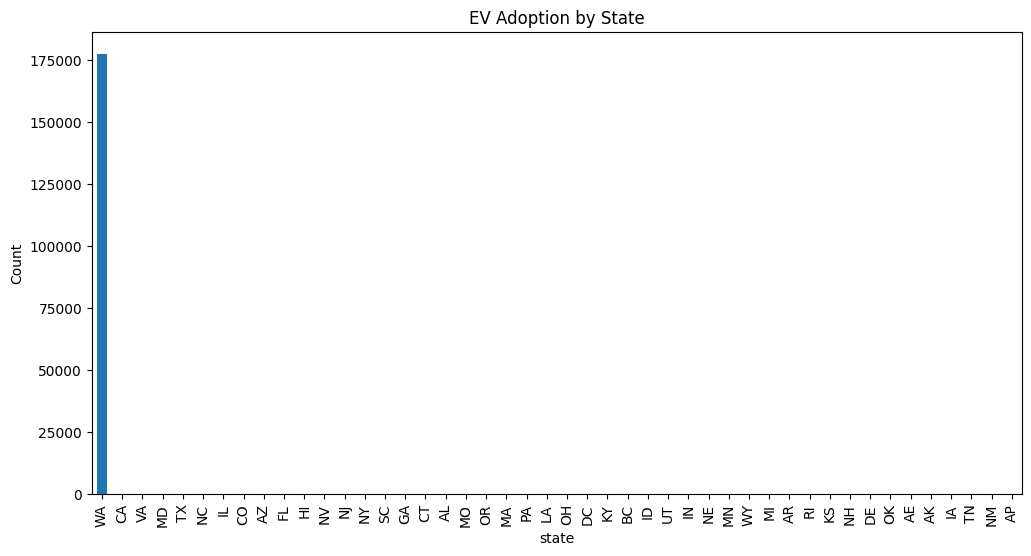

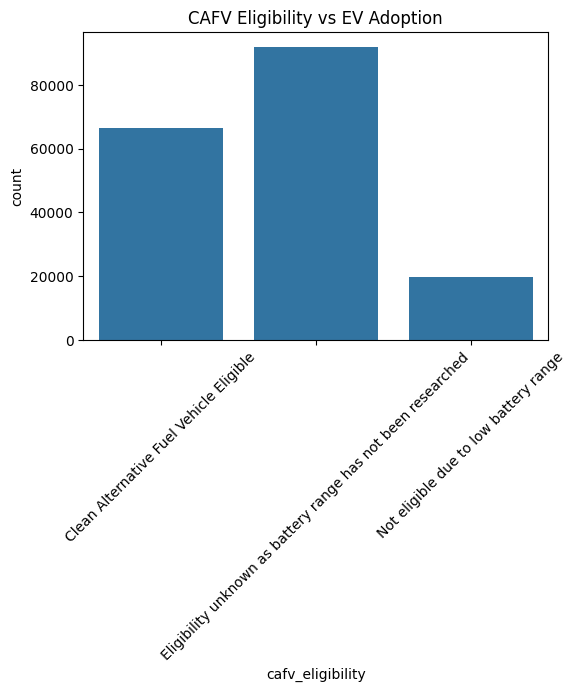

In [47]:
# Map adoption counts by state
plt.figure(figsize=(12,6))
df2["state"].value_counts().plot(kind="bar")
plt.title("EV Adoption by State")
plt.ylabel("Count")
plt.show()

# Compare adoption vs CAFV eligibility
plt.figure(figsize=(6,4))
sns.countplot(x="cafv_eligibility", data=df2)
plt.title("CAFV Eligibility vs EV Adoption")
plt.xticks(rotation=45)  # Rotate labels if too long
plt.show()

5. Real-world performance is worse than promised

In [48]:
# Specs range vs real-world distance driven per charge
plt.figure(figsize=(8,5))
sns.scatterplot(x="range", y="distance_driven_(since_last_charge)_(km)", data=df3.merge(df1, left_on="vehicle_model", right_on="car_name", how="inner"))
plt.title("Specs Range vs Real-World Distance Driven")
plt.xlabel("Spec Range (km)")
plt.ylabel("Distance Driven (km)")
plt.show()

# Drop in efficiency with colder temps
plt.figure(figsize=(8,5))
sns.scatterplot(x="temperature_(°c)", y="energy_consumed_(kwh)", data=df3, alpha=0.6)
plt.title("Energy Consumption vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

ValueError: You are trying to merge on object and int64 columns for key 'vehicle_model'. If you wish to proceed you should use pd.concat

<Figure size 800x500 with 0 Axes>

6. Batteries degrade with time & weather

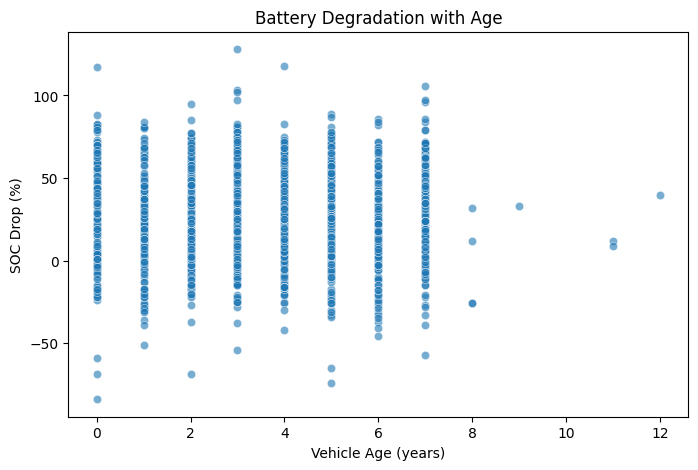

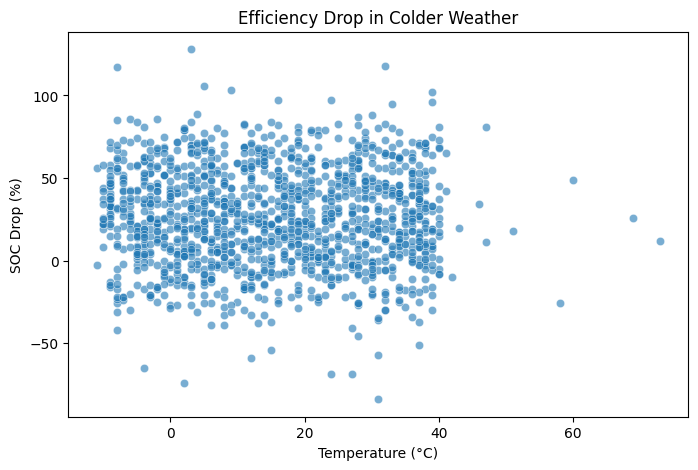

In [49]:
# SOC drop vs Vehicle Age
df3["soc_drop"] = df3["state_of_charge_(end_%)"] - df3["state_of_charge_(start_%)"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="vehicle_age_(years)", y="soc_drop", data=df3, alpha=0.6)
plt.title("Battery Degradation with Age")
plt.xlabel("Vehicle Age (years)")
plt.ylabel("SOC Drop (%)")
plt.show()

# Efficiency drop vs Temperature
plt.figure(figsize=(8,5))
sns.scatterplot(x="temperature_(°c)", y="soc_drop", data=df3, alpha=0.6)
plt.title("Efficiency Drop in Colder Weather")
plt.xlabel("Temperature (°C)")
plt.ylabel("SOC Drop (%)")
plt.show()


### APPLYING ENCODING ON THE DATASETS

DATASET 1

ONE HOT ENCODING applied on Categorical Columns

In [50]:
df1=pd.get_dummies(df1,columns=['car_name','car_name_link'] , drop_first=True, dtype='Int64')

SCALING OF THE NUMERIC COLUMNS

In [51]:
scaler = StandardScaler()
numerical_features = ['battery','efficiency','fast_charge','price.de.','range','top_speed','acceleration..0.100.','price_usd_estimated']

df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

KeyError: "['battery', 'acceleration..0.100.'] not in index"

In [ ]:
df1.head()

,battery,efficiency,fast_charge,price.de.,range,top_speed,acceleration..0.100.,price_usd_estimated,car_name_Abarth 500e Hatchback,car_name_Aiways U5,...,car_name_link_https://ev-database.org/car/2038/Ford-Mustang-Mach-E-GT,car_name_link_https://ev-database.org/car/2039/Citroen-e-C3,car_name_link_https://ev-database.org/car/2040/BMW-iX2-xDrive30,car_name_link_https://ev-database.org/car/2041/Smart-1-Pro,car_name_link_https://ev-database.org/car/2042/Nissan-Townstar-EV-Passenger,car_name_link_https://ev-database.org/car/2044/Hyundai-IONIQ-5-N,car_name_link_https://ev-database.org/car/2045/Mercedes-EQE-SUV-300,car_name_link_https://ev-database.org/car/2046/Mercedes-EQE-SUV-350plus,car_name_link_https://ev-database.org/car/2047/Mercedes-EQE-SUV-350-4MATIC,car_name_link_https://ev-database.org/car/2048/Mercedes-EQE-SUV-500-4MATIC
0,0.188720,-0.727285,0.496939,-0.211230,0.609385,0.997205,-0.773185,-0.211238,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.644590,-1.825666,0.624118,-0.609628,0.469416,0.554993,-0.437018,-0.609613,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.546553,-0.382080,-0.774848,-0.659284,-0.370400,-0.578178,-0.100850,-0.659280,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.448517,-0.758668,0.327367,-0.803582,-0.090462,-0.578178,0.235317,-0.803584,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.188720,-1.449078,0.963261,-0.329439,1.262575,0.554993,-1.109353,-0.329424,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df1.isnull().sum().sum()

np.int64(2923)

DATASET 2

Applying Label Encoder on Columns where data is ordinal 

In [53]:
label_encoder = LabelEncoder()
df2['cafv_eligibility'] = label_encoder.fit_transform(df2['cafv_eligibility'])
df2['electric_utility'] = label_encoder.fit_transform(df2['electric_utility'])
df2['2020_census_tract'] = label_encoder.fit_transform(df2['2020_census_tract'])

In [54]:
LabelEncoder ()
print(df2[['cafv_eligibility','electric_utility','2020_census_tract']])

        cafv_eligibility  electric_utility  2020_census_tract
0                      0                57                820
1                      1                73               1692
2                      0                57                799
3                      0                74               1153
4                      1                73               1259
...                  ...               ...                ...
177861                 1                74               1405
177862                 1                22               1318
177863                 1                72                637
177864                 1                74               1125
177865                 1                19               1537

[177866 rows x 3 columns]


Applying One-hot Encoding on categorical columns

In [55]:
df2=pd.get_dummies(df2,columns=['country','state','electric_vehicle_type'] , drop_first=True)

Applying frequency encoding on columns when there's no clear order but too many unique values

In [56]:
freq_map = df2['city'].value_counts() 
df2['make_freq_encoded'] = df2['city'].map(freq_map)

In [57]:
freq_map = df2['make'].value_counts() 
df2['make_freq_encoded'] = df2['make'].map(freq_map)

Applying Hash encoding

In [58]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
import category_encoders as ce

hash_encoder = ce.HashingEncoder(cols=['model'], n_components=8)  
model_hashed = hash_encoder.fit_transform(df2[['model']])  # returns 8 hashed features

df2 = pd.concat([df2.drop(columns=['model']), model_hashed], axis=1)

Scaling the Numeric columns

In [60]:
scaler = StandardScaler()
numerical_features = ['postal_code','model_year','electric_range','base_msrp','legislative_district','dol_vehicle_id']

df2[numerical_features] = scaler.fit_transform(df2[numerical_features])

In [61]:
df2.isnull().sum().sum()

np.int64(174523)

DATASET 3

Counting the unique values

In [62]:
df3['vehicle_model'].unique()

array(['BMW i3', 'Hyundai Kona', 'Chevy Bolt', 'Nissan Leaf',
       'Tesla Model 3'], dtype=object)

In [63]:
df3['charging_station_location'].unique()

array(['Houston', 'San Francisco', 'Los Angeles', 'Chicago', 'New York'],
      dtype=object)

In [64]:
df3['time_of_day'].unique()

array(['Evening', 'Morning', 'Afternoon', 'Night'], dtype=object)

In [65]:
df3['day_of_week'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Saturday', 'Friday', 'Wednesday',
       'Sunday'], dtype=object)

In [66]:
df3['charger_type'].unique()

array(['DC Fast Charger', 'Level 1', 'Level 2'], dtype=object)

In [67]:
df3['user_type'].unique()

array(['Commuter', 'Casual Driver', 'Long-Distance Traveler'],
      dtype=object)

Applying Label Encoder on object type columns (bcoz they r having ordinal categorical data values)

In [68]:
label_encoder = LabelEncoder()
df3['vehicle_model'] = label_encoder.fit_transform(df3['vehicle_model'])
df3['charging_station_location'] = label_encoder.fit_transform(df3['charging_station_location'])
df3['time_of_day'] = label_encoder.fit_transform(df3['time_of_day'])
df3['day_of_week'] = label_encoder.fit_transform(df3['day_of_week'])
df3['charger_type'] = label_encoder.fit_transform(df3['charger_type'])
df3['user_type'] = label_encoder.fit_transform(df3['user_type'])

In [69]:
LabelEncoder()

LabelEncoder()

In [70]:
print(df3[['vehicle_model','charging_station_location','time_of_day','day_of_week','charger_type','user_type']])

      vehicle_model  charging_station_location  time_of_day  day_of_week  \
0                 0                          1            1            5   
1                 2                          4            2            1   
2                 1                          4            2            4   
3                 2                          1            1            2   
4                 2                          2            2            2   
...             ...                        ...          ...          ...   
1315              3                          3            1            3   
1316              0                          3            1            5   
1317              3                          3            1            5   
1318              1                          4            0            3   
1319              3                          2            1            1   

      charger_type  user_type  
0                0          1  
1                1     

Scaling the numeric type data

In [71]:
scaler = StandardScaler()
numerical_features = ['user_id','battery_capacity_(kwh)','charging_station_id','charging_start_time', 'charging_end_time', 
                      'energy_consumed_(kwh)','charging_duration_(hours)', 'charging_rate_(kw)','charging_cost_(usd)',
                      'state_of_charge_(start_%)', 'state_of_charge_(end_%)','distance_driven_(since_last_charge)_(km)', 
                      'temperature_(°c)','vehicle_age_(years)']

df3[numerical_features] = scaler.fit_transform(df3[numerical_features])

In [72]:
df3.head()

,user_id,vehicle_model,battery_capacity_(kwh),charging_station_id,charging_station_location,charging_start_time,charging_end_time,energy_consumed_(kwh),charging_duration_(hours),charging_rate_(kw),...,day_of_week,state_of_charge_(start_%),state_of_charge_(end_%),distance_driven_(since_last_charge)_(km),temperature_(°c),vehicle_age_(years),charger_type,user_type,state_extracted,soc_drop
0,-1.730739,0,1.623166,1.030207,1,-1.178850,-1.181028,0.839652,-1.192647,0.735299,...,5,-0.836072,0.636025,1.676333,0.858731,-0.699142,0,1,Houston,57
1,-1.728115,2,1.235132,1.287279,4,-1.178644,-1.180489,-1.404045,0.658375,0.369203,...,1,-1.625199,0.577471,-0.495484,-0.085704,-0.266683,1,0,San Francisco,75
2,-1.725491,1,0.022525,-0.428847,4,-1.178438,-1.180186,-1.083517,-0.267136,0.149545,...,4,-1.749798,-0.300845,-0.972807,0.386513,-0.699142,2,1,San Francisco,63
3,-1.722866,2,-1.190081,0.585543,1,-1.178232,-1.179787,1.663867,-1.192647,0.515641,...,2,1.406710,1.455786,0.554625,1.533328,-1.131602,1,2,Houston,17
4,-1.720242,2,-1.190081,-0.936043,2,-1.178026,-1.179984,-1.037727,-0.267136,-1.168403,...,2,0.202253,-0.652172,0.602358,-1.569817,-1.131602,1,2,Los Angeles,10


In [73]:
df3.isnull().sum().sum()

np.int64(0)

In [74]:
df1.to_csv("../data/processed/EV_specs.csv", index=False)

In [75]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\ASUS\Desktop\EV_project\Spatio-Temporal-EV-Adoption-Forecasting-Project\notebook


In [77]:
df3.to_csv("../data/processed/cleaned_charging_patterns.csv", index=False)